In [3]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import pyVIA.core as via
import warnings
warnings.filterwarnings('ignore')

### Import data

In [4]:
df = pd.read_csv('../supp/Cell.embeddings.pro.pre.rv2.E12R1_rV2.11.05.22.csv', sep=',')

In [5]:
cell_types = set(df['label'])

In [6]:
len(cell_types)

15

In [7]:
cols = ["gold", "purple", "gray", "red", "blue", "limegreen", "cyan", "moccasin", "maroon", "darkgreen",
        "teal", "darkblue", "brown", "pink", "orange"]
len(cols)

15

In [8]:
cell_dict = {cell : color for cell, color in zip(cell_types, cols)}

In [9]:
cell_annot = df['label'].values

In [10]:
true_label = [];
count = 0;
found_annot = False
for annot in cell_annot:
    for cell_type_i in cell_types:
        if cell_type_i in annot:
            true_label.append(cell_type_i)
            found_annot = True

    if found_annot == False:
        true_label.append('unknown')
    found_annot = False

In [11]:
LSIcol = ["LSI_" + str(a) for a in range(2,31)]
UMAPcol = ["UMAP_1","UMAP_2"]

embedding = np.array(df[UMAPcol])

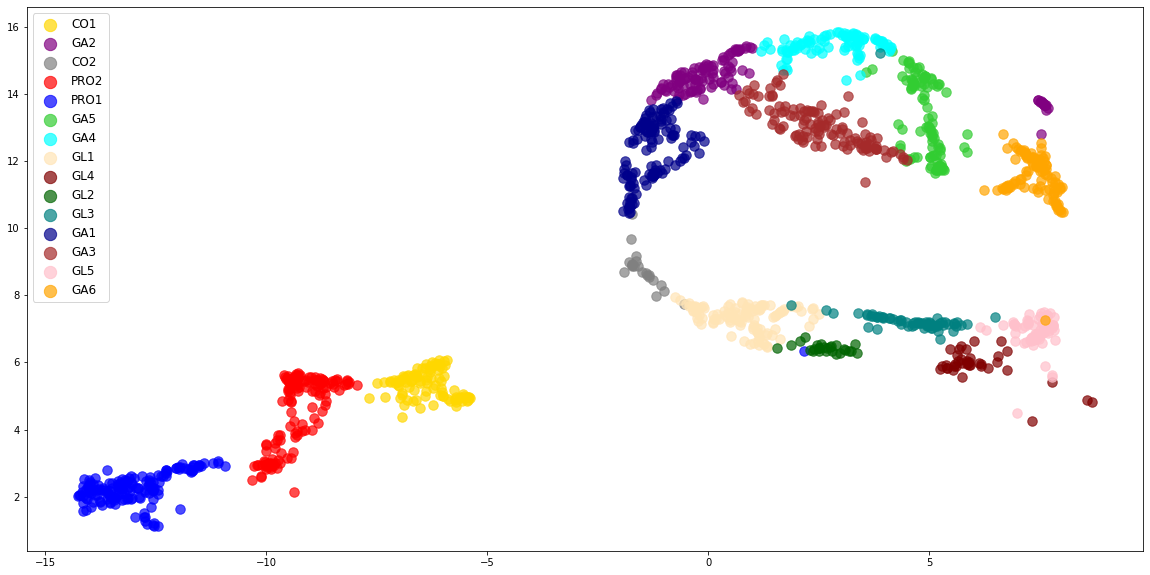

In [12]:
fig, ax = plt.subplots(figsize=[20,10])
for key in cell_dict:
    loc = np.where(np.asarray(true_label) == key)[0]
    ax.scatter(embedding[loc, 0], embedding[loc, 1], c=cell_dict[key], alpha=0.7, label=key, s=90)

plt.legend(fontsize='large', markerscale=1.3)
plt.show()

### Run VIA

In [13]:
from math import sqrt

In [14]:
knn = int(sqrt(df.shape[0]))
random_seed = 2020

In [15]:
X_in = df[LSIcol].values

In [16]:
start_ncomp = 0
root, dataset = df.loc[df['label'] == 'PRO1'].index, ''

In [17]:
v0 = via.VIA(X_in,
             true_label=true_label,
             jac_std_global=0.15,
             dist_std_local=1,
             knn=knn,
             too_big_factor=0.3,
             root_user=root,
             dataset=dataset,
             random_seed=random_seed,
             is_coarse=True,
             preserve_disconnected=True)

In [18]:
%%capture
v0.run_VIA()

dict of terminal state pairs, Super: sub:  {}


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 1 is a super terminal with sub_terminal cluster 1
super cluster 2 is a super terminal with sub_terminal cluster 2
super cluster 9 is a super terminal with sub_terminal cluster 9
super cluster 10 is a super terminal with sub_terminal cluster 10
super cluster 13 is a super terminal with sub_terminal cluster 13
super cluster 15 is a super terminal with sub_terminal cluster 15
super cluster 16 is a super terminal with sub_terminal cluster 16
super cluster 20 is a super terminal with sub_terminal cluster 20
super cluster 21 is a super terminal with sub_terminal cluster 21


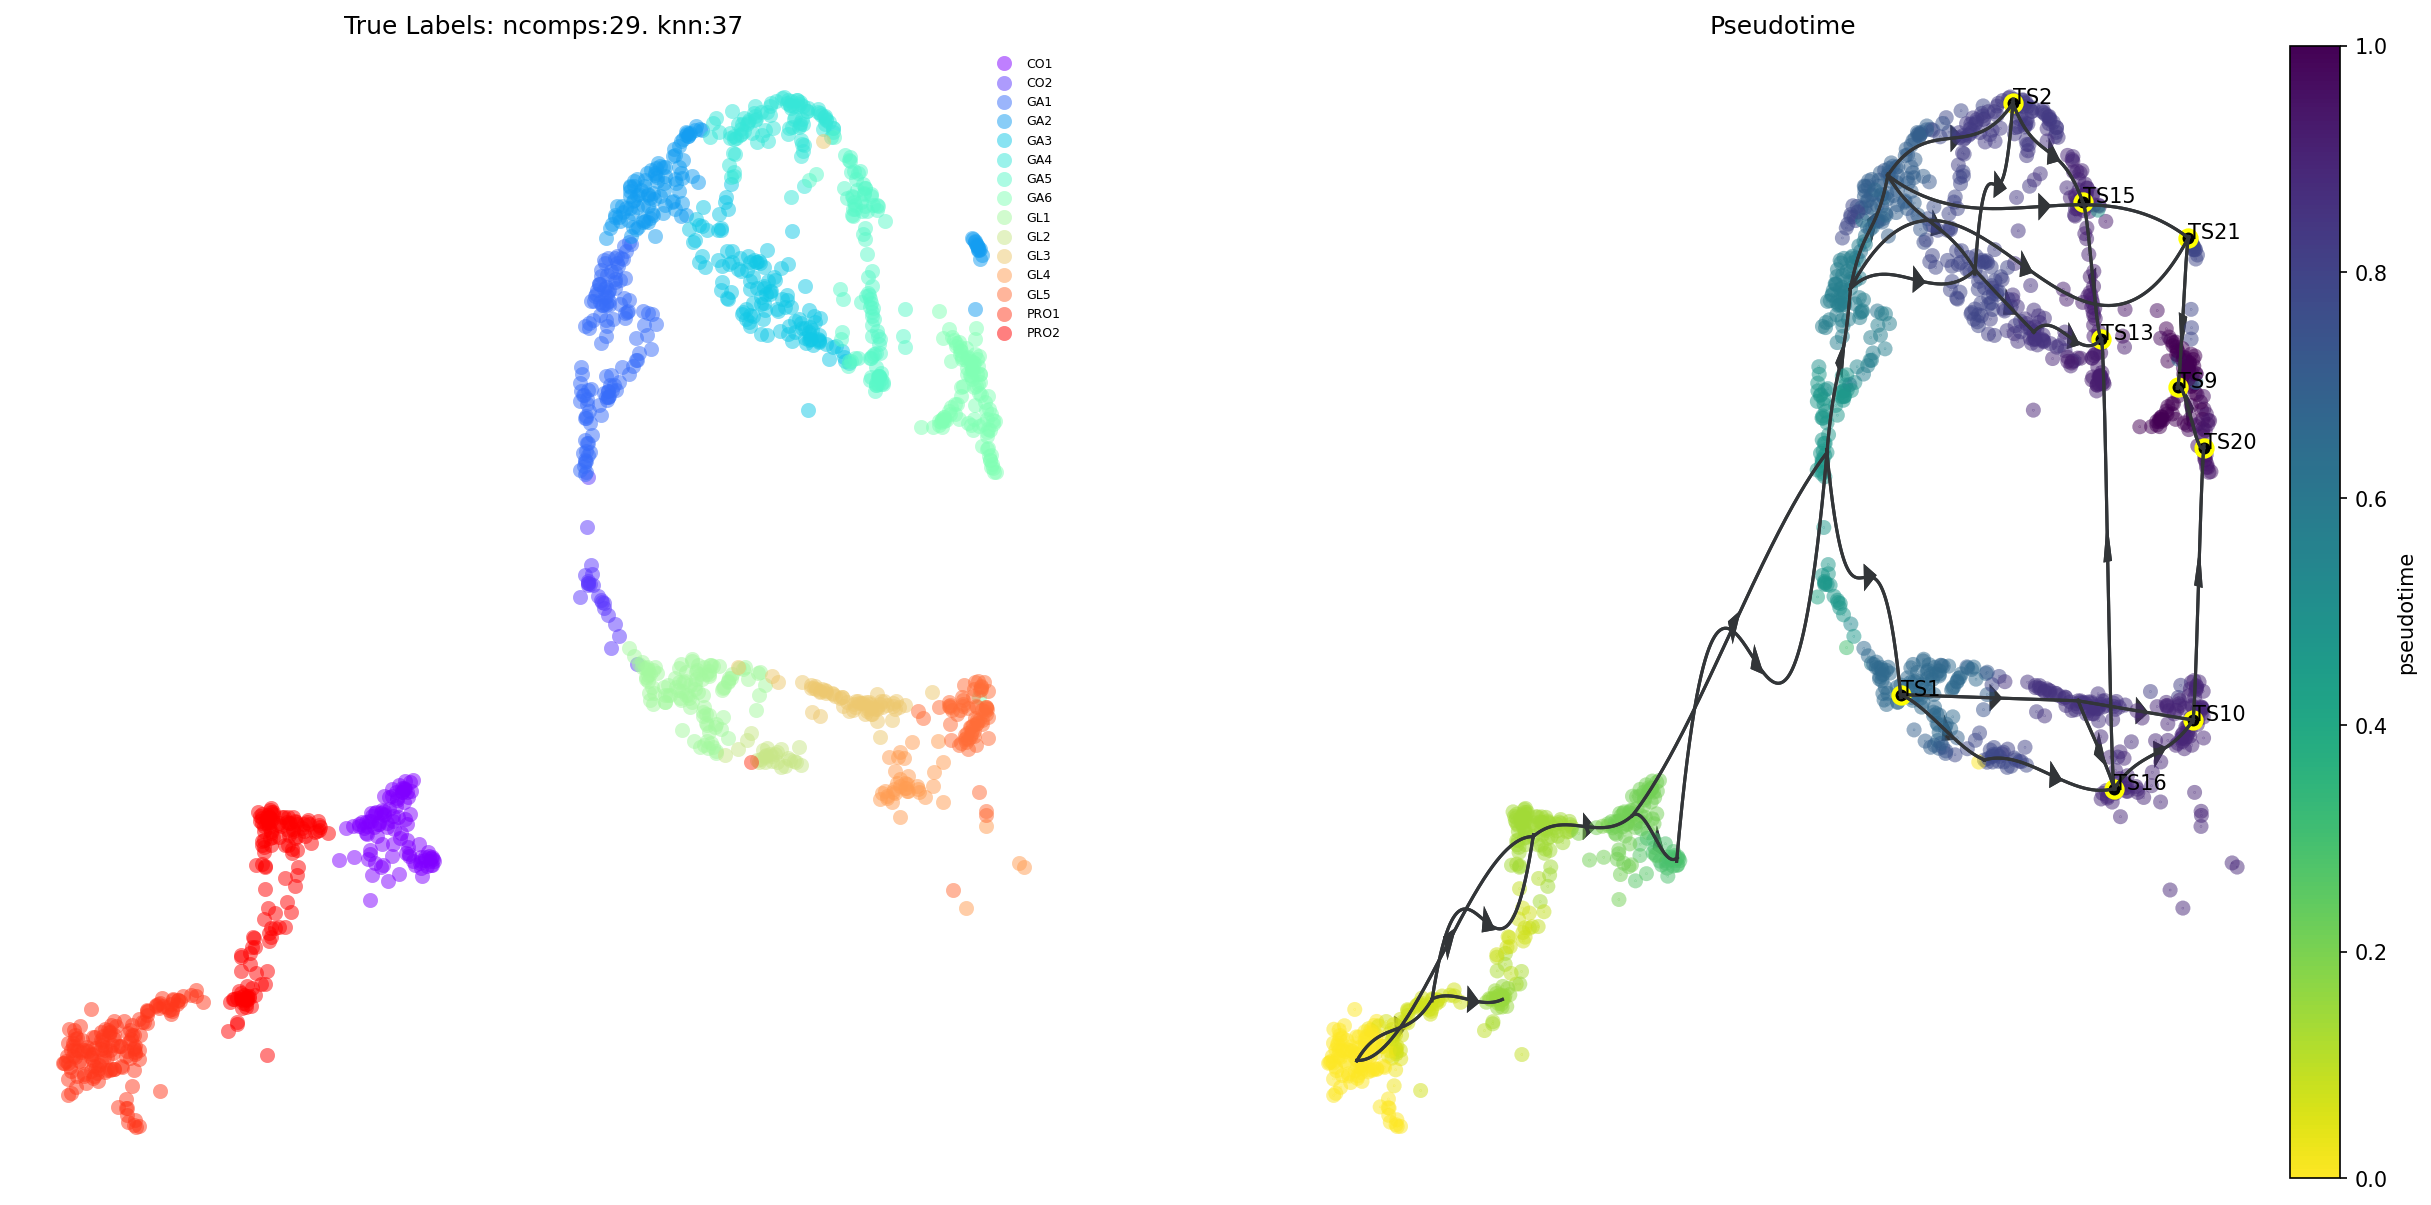

In [19]:
via.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=embedding)

In [28]:
df['pseudotime'] = v0.single_cell_pt_markov

In [23]:
len(set(v0.single_cell_pt_markov)) # nr of pseudotime bins

84

In [29]:
df2 = df[['barcode', 'pseudotime']]

In [30]:
# Save to csv for R
df2.to_csv('rv2_via_pseudotime_110522.csv')

In [20]:
v1 = via.VIA(X_in,
             true_label,
             jac_std_global=0.95,
             dist_std_local=1,
             knn=knn,
             too_big_factor=0.1,
             root_user=root,
             is_coarse=False,
             preserve_disconnected=False,
             dataset='',
             random_seed=random_seed,
             via_coarse = v0,
             pseudotime_threshold_TS=20)

In [21]:
%%capture
v1.run_VIA()

dict of terminal state pairs, Super: sub:  {1: 0, 2: 6, 9: 4, 10: 11, 13: 5, 15: 5, 16: 2, 20: 4, 21: 13}


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

super cluster 1 is a super terminal with sub_terminal cluster 0
super cluster 2 is a super terminal with sub_terminal cluster 6
super cluster 9 is a super terminal with sub_terminal cluster 4
super cluster 10 is a super terminal with sub_terminal cluster 11
super cluster 13 is a super terminal with sub_terminal cluster 5
super cluster 15 is a super terminal with sub_terminal cluster 5
super cluster 16 is a super terminal with sub_terminal cluster 2
super cluster 20 is a super terminal with sub_terminal cluster 4
super cluster 21 is a super terminal with sub_terminal cluster 13


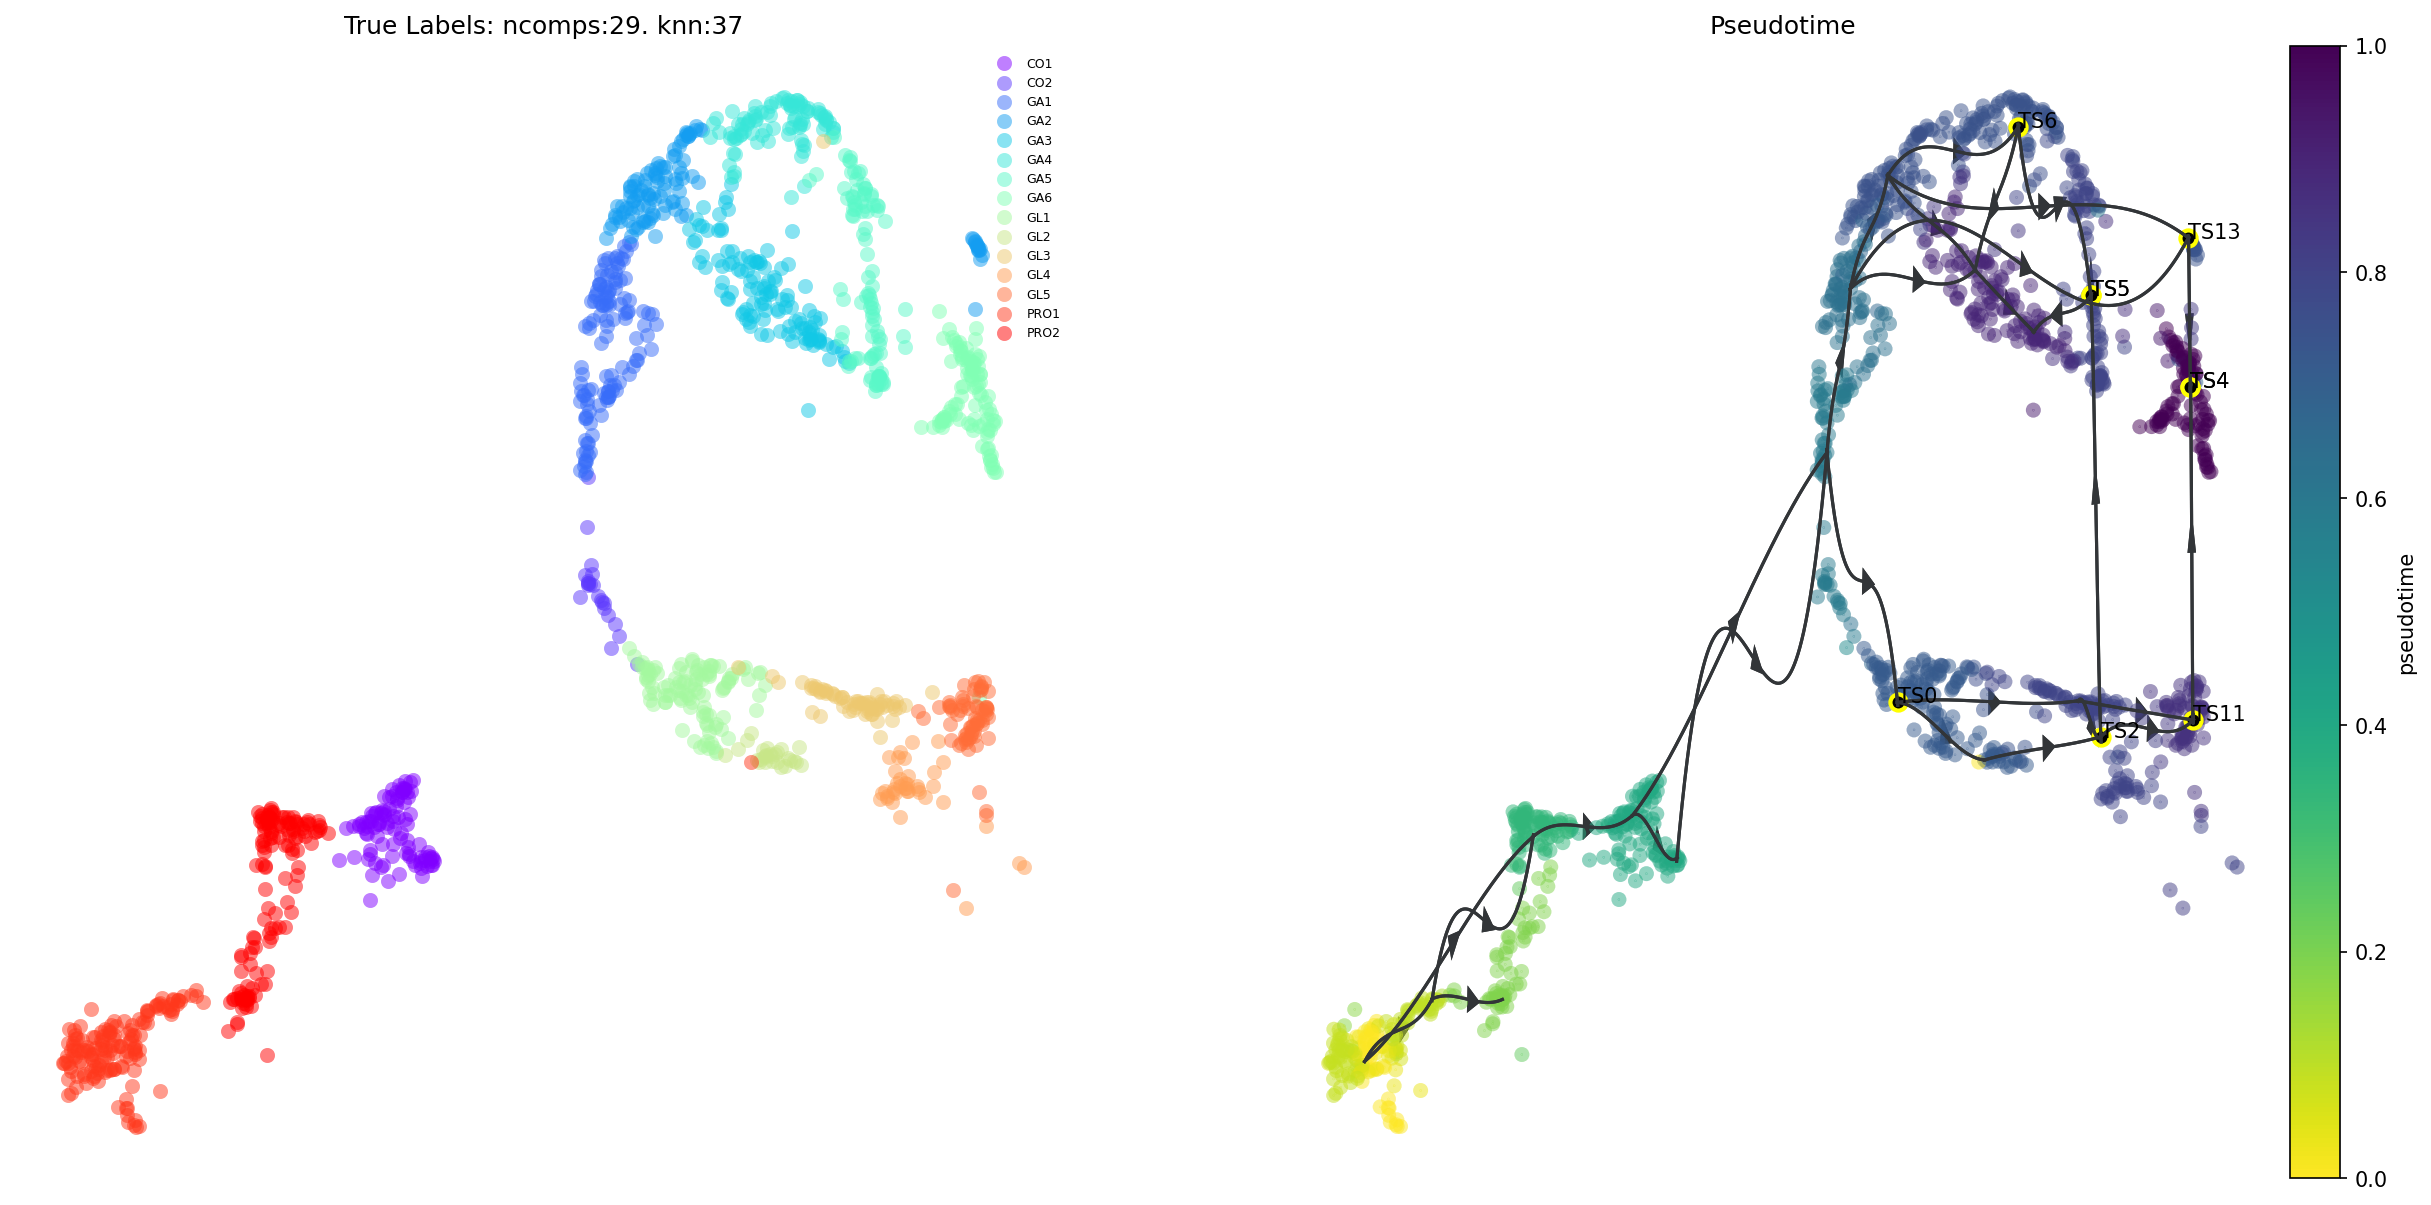

In [22]:
via.draw_trajectory_gams(via_coarse=v0, via_fine=v1, embedding=embedding)